# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Singular-Value-Decomposition-(SVD)" data-toc-modified-id="Singular-Value-Decomposition-(SVD)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Singular Value Decomposition (SVD)</a></div><div class="lev2 toc-item"><a href="#SVD-tells-us-everything-about-a-matrix" data-toc-modified-id="SVD-tells-us-everything-about-a-matrix-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>SVD tells us everything about a matrix</a></div><div class="lev2 toc-item"><a href="#Proof-of-existence-of-SVD-using-eigen-decomposition-of-Gram-matrix" data-toc-modified-id="Proof-of-existence-of-SVD-using-eigen-decomposition-of-Gram-matrix-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Proof of existence of SVD using eigen-decomposition of Gram matrix</a></div><div class="lev2 toc-item"><a href="#Some-exercises" data-toc-modified-id="Some-exercises-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Some exercises</a></div><div class="lev2 toc-item"><a href="#Geometry-of-SVD" data-toc-modified-id="Geometry-of-SVD-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Geometry of SVD</a></div><div class="lev2 toc-item"><a href="#SVD-and-generalized-inverse" data-toc-modified-id="SVD-and-generalized-inverse-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>SVD and generalized inverse</a></div><div class="lev2 toc-item"><a href="#Eckart-Young-theorem:-best-approximation-to-a-matrix" data-toc-modified-id="Eckart-Young-theorem:-best-approximation-to-a-matrix-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Eckart-Young theorem: best approximation to a matrix</a></div><div class="lev2 toc-item"><a href="#Singular-vectors-and-Rayleigh-quotient" data-toc-modified-id="Singular-vectors-and-Rayleigh-quotient-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Singular vectors and Rayleigh quotient</a></div><div class="lev2 toc-item"><a href="#Principal-component-analysis-(PCA)" data-toc-modified-id="Principal-component-analysis-(PCA)-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Principal component analysis (PCA)</a></div><div class="lev2 toc-item"><a href="#PCA-example:-Fisher's-Iris-data" data-toc-modified-id="PCA-example:-Fisher's-Iris-data-19"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>PCA example: Fisher's Iris data</a></div><div class="lev2 toc-item"><a href="#PCA-example:-genomics" data-toc-modified-id="PCA-example:-genomics-110"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>PCA example: genomics</a></div><div class="lev2 toc-item"><a href="#Matrix-completion" data-toc-modified-id="Matrix-completion-111"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Matrix completion</a></div><div class="lev2 toc-item"><a href="#Compressed-sensing" data-toc-modified-id="Compressed-sensing-112"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Compressed sensing</a></div>

# Singular Value Decomposition (SVD)

In [1]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()

  Activating environment at `~/Documents/github.com/ucla-biostat216-2021fall.github.io/slides/12-svd/Project.toml`


In [2]:
using Images, LinearAlgebra, Random, RDatasets, StatsBase, StatsModels, StatsPlots
plotly() # using plotly for 3D-interacive graphing

┌ Info: For saving to png with the Plotly backend PlotlyBase has to be installed.
└ @ Plots /Users/huazhou/.julia/packages/Plots/1RWWg/src/backends.jl:432


Plots.PlotlyBackend()

- We saw in earlier lectures that a matrix can have complex eigenvalues and eigenvectors. Symmetric matrices have the nice property that all eigenvalues and eigenvectors are real. The singular value decomposition (SVD) generalizes the spectral decomposition to general rectangular matrices.

- Applied mathematicians and statisticians call SVD the [**singularly (most) valuable decomposition**](https://doi.org/10.1080/07468342.1996.11973744). 

- Let $\mathbf{A} \in \mathbb{R}^{m \times n}$ with $\text{rank}(\mathbf{A})=r$. We assume $m \ge n$. Instead of the eigen-equation, now we have
\begin{eqnarray*}
\mathbf{A} \mathbf{v}_i &=& \sigma_i \mathbf{u}_i, \quad i = 1,\ldots,r \\
\mathbf{A} \mathbf{v}_i &=& 0 \, \mathbf{u}_i, \quad i = r+1,\ldots,n,
\end{eqnarray*}
where the **left singular vectors** $\mathbf{u}_i \in \mathbb{R}^m$ are orthonormal, the **right singular vectors** $\mathbf{v}_i \in \mathbb{R}^n$ are orthonormal, and the **singular values** 
$$
\sigma_1 \ge \cdots \ge \sigma_r > \sigma_{r+1} = \cdots = \sigma_{n} = 0.
$$

- Collecting above equations into matrix multiplication format:
$$
\mathbf{A} \begin{pmatrix} \mid & & \mid \\ \mathbf{v}_1 & \cdots & \mathbf{v}_n \\ \mid & & \mid \end{pmatrix} = \begin{pmatrix} \mid & & \mid \\ \mathbf{u}_1 & \cdots & \mathbf{u}_n \\ \mid & & \mid \end{pmatrix} \begin{pmatrix} \sigma_1 & & & \\ & \ddots & & \\ & & \sigma_r & \\ & & & \mathbf{O}_{n-r} \end{pmatrix},
$$
or
$$
\mathbf{A} \mathbf{V} = \mathbf{U} \boldsymbol{\Sigma}.
$$
Multiplying both sides by $\mathbf{V}'$, we have the famous **singular value decomposition (SVD)**
$$
\mathbf{A} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}' = \sigma_1 \mathbf{u}_1 \mathbf{v}_1' + \cdots + \sigma_r \mathbf{u}_r \mathbf{v}_r',
$$
where $\mathbf{U} \in \mathbb{R}^{m \times n}$ has orthogonal columns, $\boldsymbol{\Sigma} = \text{diag}(\sigma_1, \ldots, \sigma_r, \mathbf{0}_{n-r})$, and $\mathbf{V} \in \mathbb{R}^{n \times n}$ is orthogonal.
$$
\mathbf{A} = \begin{pmatrix} \mid & & \mid \\ \mathbf{u}_1 & \cdots & \mathbf{u}_n \\ \mid & & \mid \end{pmatrix} \begin{pmatrix} \sigma_1 & & & \\ & \ddots & & \\ & & \sigma_r & \\ & & & \mathbf{O}_{n-r} \end{pmatrix} \begin{pmatrix} - & \mathbf{v}_1' & -\\  & \vdots & \\ - & \mathbf{v}_n & - \end{pmatrix}.
$$

In [3]:
# a square matrix
A = [3.0 0.0; 4.0 5.0]

2×2 Matrix{Float64}:
 3.0  0.0
 4.0  5.0

In [4]:
# eigenvalues and eigenvectors
eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 3.0
 5.0
vectors:
2×2 Matrix{Float64}:
  0.447214  0.0
 -0.894427  1.0

In [5]:
# singular values and singular vectors
# different from eigenvalues and eigenvectors
Asvd = svd(A)

SVD{Float64, Float64, Matrix{Float64}}
U factor:
2×2 Matrix{Float64}:
 -0.316228  -0.948683
 -0.948683   0.316228
singular values:
2-element Vector{Float64}:
 6.70820393249937
 2.2360679774997894
Vt factor:
2×2 Matrix{Float64}:
 -0.707107  -0.707107
 -0.707107   0.707107

In [6]:
# orthogonality of U
Asvd.U'Asvd.U

2×2 Matrix{Float64}:
 1.0          1.11022e-16
 1.11022e-16  1.0

In [7]:
# orthogonality of V
Asvd.V'Asvd.V

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [8]:
A ≈ Asvd.U * Diagonal(Asvd.S) * Asvd.V'

true

- **Reduced form of the SVD.** If we just keep the first $r$ singular triplets ($\sigma_i, \mathbf{u}_i, \mathbf{v}_i$), then
$$
\mathbf{A} = \mathbf{U}_r \boldsymbol{\Sigma}_r \mathbf{V}_r',
$$
where $\mathbf{U}_r \in \mathbb{R}^{m \times r}$, $\boldsymbol{\Sigma}_r = \text{diag}(\sigma_1, \ldots, \sigma_r)$, and $\mathbf{V}_r \in \mathbb{R}^{n \times r}$
$$
\mathbf{A} = \begin{pmatrix} \mid & & \mid \\ \mathbf{u}_1 & \cdots & \mathbf{u}_r \\ \mid & & \mid \end{pmatrix} \begin{pmatrix} \sigma_1 & & \\ & \ddots & \\ & & \sigma_r \end{pmatrix} \begin{pmatrix} - & \mathbf{v}_1' & -\\  & \vdots & \\ - & \mathbf{v}_r & - \end{pmatrix}.
$$

- **Full SVD.** Opposite to the reduced form of SVD, we can also augment the $\mathbf{U}$ matrix to be a square orthogonal matrix to obtain the **full SVD**
$$
\mathbf{A} = \begin{pmatrix} \mid & & \mid \\ \mathbf{u}_1 & \cdots & \mathbf{u}_m \\ \mid & & \mid \end{pmatrix} \begin{pmatrix} \sigma_1 & & & \\ & \ddots & & \\ & & \sigma_r & \\ & & & \mathbf{O}_{n-r} \\ \\ \\ & & \mathbf{O}_{m-n, n} \end{pmatrix} \begin{pmatrix} - & \mathbf{v}_1' & - \\
& \vdots & \\ - & \mathbf{v}_n' & - \end{pmatrix}.
$$

In [9]:
Random.seed!(216)
m, n, r = 5, 3, 2
# a rank r matrix by rank factorization
A = randn(m, r) * randn(r, n)

5×3 Matrix{Float64}:
 -1.0641     0.119504     0.0684963
 -1.31293   -1.57973e-5  -0.0936312
 -0.726329  -0.584099    -0.757408
 -1.56673   -1.47246     -1.89051
  2.11855    0.495045     0.749092

In [10]:
# svd: U is mxn, Σ is nxn, V is nxn
# SVD
svd(A)

SVD{Float64, Float64, Matrix{Float64}}
U factor:
5×3 Matrix{Float64}:
 -0.191907   0.489266  -0.485372
 -0.273553   0.48802   -0.308709
 -0.296984  -0.188106  -0.492257
 -0.693606  -0.572429  -0.0627439
  0.564847  -0.399245  -0.650276
singular values:
3-element Vector{Float64}:
 3.92086624799641
 1.5634315539256385
 7.808175744336089e-17
Vt factor:
3×3 Matrix{Float64}:
  0.781058    0.370191  0.502899
 -0.622804    0.520374  0.584231
 -0.0454182  -0.769526  0.636999

In [11]:
# full SVD
svd(A, full=true)

SVD{Float64, Float64, Matrix{Float64}}
U factor:
5×5 Matrix{Float64}:
 -0.191907   0.489266  -0.485372   -0.487873   0.500185
 -0.273553   0.48802   -0.308709    0.755421  -0.145061
 -0.296984  -0.188106  -0.492257   -0.326642  -0.726226
 -0.693606  -0.572429  -0.0627439   0.169463   0.398222
  0.564847  -0.399245  -0.650276    0.236444   0.206851
singular values:
3-element Vector{Float64}:
 3.92086624799641
 1.5634315539256385
 7.808175744336089e-17
Vt factor:
3×3 Matrix{Float64}:
  0.781058    0.370191  0.502899
 -0.622804    0.520374  0.584231
 -0.0454182  -0.769526  0.636999

## SVD tells us everything about a matrix

<img src="../04-vecsp/four_fundamental_subspaces.png" width=400 align="center"/>

- **SVD and four fundamental subspaces.** Given the **full SVD**
\begin{eqnarray*}
\mathbf{A} &=& \begin{pmatrix} \mid & & \mid & \mid & & \mid \\ \mathbf{u}_1 & \cdots & \mathbf{u}_r & \mathbf{u}_{r+1} & \cdots & \mathbf{u}_m \\ \mid & & \mid & \mid & & \mid \end{pmatrix} \begin{pmatrix} \sigma_1 & & & \\ & \ddots & & \\ & & \sigma_r & \\ & & & \mathbf{O}_{n-r} \\ \\ & & \mathbf{O}_{m-n, n} & \end{pmatrix} \begin{pmatrix} - & \mathbf{v}_1' & - \\ & \vdots & \\ - & \mathbf{v}_r' & - \\ - & \mathbf{v}_{r+1}' & - \\ & \vdots & \\ - & \mathbf{v}_n' & - \end{pmatrix} \\
&=& \begin{pmatrix} \mathbf{U}_r & \mathbf{U}_{m-r} \end{pmatrix} \begin{pmatrix} \boldsymbol{\Sigma}_r & & \\ & & \mathbf{O}_{n-r} \\ \\ & \mathbf{O}_{m-n,n} & \end{pmatrix} \begin{pmatrix} \mathbf{V}_r' \\ \mathbf{V}_{n-r}' \end{pmatrix},
\end{eqnarray*}
Then
    1. $\mathcal{C}(\mathbf{A}) = \mathcal{C}(\mathbf{U}_r)$;  $\quad \mathbf{U}_r \mathbf{U}_r'$ is the orthogonal projector into $\mathcal{C}(\mathbf{A})$.
    2. $\mathcal{N}(\mathbf{A}') = \mathcal{C}(\mathbf{U}_{m-r})$; $\quad \mathbf{U}_{m-r} \mathbf{U}_{m-r}'$ is the orthogonal projector into $\mathcal{N}(\mathbf{A}')$.
    3. $\mathcal{C}(\mathbf{A}') = \mathcal{C}(\mathbf{V}_{r})$; $\quad \mathbf{V}_{r} \mathbf{V}_{r}'$ is the orthogonal projector into $\mathcal{C}(\mathbf{A}')$.
    4. $\mathcal{N}(\mathbf{A}) = \mathcal{C}(\mathbf{V}_{n-r})$; $\quad \mathbf{V}_{n-r} \mathbf{V}_{n-r}'$ is the orthogonal projector into $\mathcal{N}(\mathbf{A})$.
    
- $\text{rank}(\mathbf{A}) = r = \text{# positive singular values}$.  

- **Frobenius norm** $\|\mathbf{A}\|_{\text{F}}^2 = \sum_{i,j} a_{ij}^2 = \text{tr}(\mathbf{A}' \mathbf{A}) = \sum_i \sigma_i^2$.

- **Spectral norm** or **$\ell_2$ matrix norm** : $\|\mathbf{A}\|_2 = \max \frac{\|\mathbf{A} \mathbf{x}\|}{\|\mathbf{x}\|} = \sigma_1$. HW6_7, Q7.7.

In [12]:
Random.seed!(216)
# generate a rank deficient matrix
m, n, r = 5, 3, 2
A = randn(m, r) * randn(r, n)
# full svd
Asvd = svd(A, full=true)

SVD{Float64, Float64, Matrix{Float64}}
U factor:
5×5 Matrix{Float64}:
 -0.191907   0.489266  -0.485372   -0.487873   0.500185
 -0.273553   0.48802   -0.308709    0.755421  -0.145061
 -0.296984  -0.188106  -0.492257   -0.326642  -0.726226
 -0.693606  -0.572429  -0.0627439   0.169463   0.398222
  0.564847  -0.399245  -0.650276    0.236444   0.206851
singular values:
3-element Vector{Float64}:
 3.92086624799641
 1.5634315539256385
 7.808175744336089e-17
Vt factor:
3×3 Matrix{Float64}:
  0.781058    0.370191  0.502899
 -0.622804    0.520374  0.584231
 -0.0454182  -0.769526  0.636999

In [13]:
# Frobenius norm
norm(A) ≈ norm(Asvd.S)

true

In [14]:
# projector to C(A)
P1 = A * pinv(A'A) * A' # WARNING: this is very inefficient code; take Biostat 257

5×5 Matrix{Float64}:
  0.276209    0.291268   -0.0350405  -0.146962   -0.303735
  0.291268    0.312995   -0.0105586  -0.0896191  -0.349355
 -0.0350405  -0.0105586   0.123583    0.313667   -0.09265
 -0.146962   -0.0896191   0.313667    0.808765   -0.163242
 -0.303735   -0.349355   -0.09265    -0.163242    0.478448

In [15]:
# projector to C(A)
P2 = Asvd.U[:, 1:2] * Asvd.U[:, 1:2]'

5×5 Matrix{Float64}:
  0.276209    0.291268   -0.0350405  -0.146962   -0.303735
  0.291268    0.312995   -0.0105586  -0.0896191  -0.349355
 -0.0350405  -0.0105586   0.123583    0.313667   -0.09265
 -0.146962   -0.0896191   0.313667    0.808765   -0.163242
 -0.303735   -0.349355   -0.09265    -0.163242    0.478448

In [16]:
# they should be equal by the uniqueness of orthogonal projector
P1 ≈ P2

true

## Proof of existence of SVD using eigen-decomposition of Gram matrix

- **Relating SVD to eigen-decomposition.** From SVD $\mathbf{A} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}'$, we have
\begin{eqnarray*}
    \mathbf{A}' \mathbf{A} &=& (\mathbf{V} \boldsymbol{\Sigma} \mathbf{U}') (\mathbf{U} \boldsymbol{\Sigma} \mathbf{V}') = \mathbf{V} \boldsymbol{\Sigma}^2 \mathbf{V}' \\
    \mathbf{A} \mathbf{A}' &=& (\mathbf{U} \boldsymbol{\Sigma} \mathbf{V}') (\mathbf{V} \boldsymbol{\Sigma} \mathbf{U}') = \mathbf{U} \boldsymbol{\Sigma}^2 \mathbf{U}'.
\end{eqnarray*}
This says 
    - $\mathbf{u}_i$ are simply the eigenvectors of the symmetric matrix $\mathbf{A} \mathbf{A}'$
    - $\mathbf{v}_i$ are simply the eigenvectors of the symmetric matrix $\mathbf{A}' \mathbf{A}$
    - $\sigma_i$ are simply $\sqrt{\lambda_i}$.
    
    Proof of existence of SVD: Start from positive eigenvalues $\lambda_i > 0$ and corresponding (orthonormal) eigenvectors $\mathbf{v}_i$ of $\mathbf{A}' \mathbf{A}$. Set $\sigma_i = \sqrt \lambda_i$ and
$$
\mathbf{u}_i = \frac{\mathbf{A} \mathbf{v}_i}{\sigma_i}, \quad i = 1,\ldots,r.
$$
Verify that $\mathbf{u}_i$ are orthonormal. Lastly, augment $\mathbf{u}_i$s by an orthogonal basis in $\mathcal{N}(\mathbf{A}')$ and augment $\mathbf{v}_i$s by an orthogonal basis in $\mathcal{N}(\mathbf{A})$.

In [17]:
A

5×3 Matrix{Float64}:
 -1.0641     0.119504     0.0684963
 -1.31293   -1.57973e-5  -0.0936312
 -0.726329  -0.584099    -0.757408
 -1.56673   -1.47246     -1.89051
  2.11855    0.495045     0.749092

In [18]:
Asvd

SVD{Float64, Float64, Matrix{Float64}}
U factor:
5×5 Matrix{Float64}:
 -0.191907   0.489266  -0.485372   -0.487873   0.500185
 -0.273553   0.48802   -0.308709    0.755421  -0.145061
 -0.296984  -0.188106  -0.492257   -0.326642  -0.726226
 -0.693606  -0.572429  -0.0627439   0.169463   0.398222
  0.564847  -0.399245  -0.650276    0.236444   0.206851
singular values:
3-element Vector{Float64}:
 3.92086624799641
 1.5634315539256385
 7.808175744336089e-17
Vt factor:
3×3 Matrix{Float64}:
  0.781058    0.370191  0.502899
 -0.622804    0.520374  0.584231
 -0.0454182  -0.769526  0.636999

In [19]:
eigen(A'A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 -8.881784244014104e-16
  2.4443182238103383
 15.37319213467742
vectors:
3×3 Matrix{Float64}:
 -0.0454182   0.622804  -0.781058
 -0.769526   -0.520374  -0.370191
  0.636999   -0.584231  -0.502899

In [20]:
eigen(A * A')

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
5-element Vector{Float64}:
 -3.108624468950438e-16
 -4.3519893263681266e-306
  3.108624468950437e-16
  2.4443182238103365
 15.37319213467741
vectors:
5×5 Matrix{Float64}:
 -0.238916  0.420577   0.699875    0.489266  -0.191907
  0.146071  0.483747  -0.657006    0.48802   -0.273553
  0.885542  0.128291   0.27527    -0.188106  -0.296984
 -0.370672  0.226039  -0.0523861  -0.572429  -0.693606
  0.0       0.722186   0.0        -0.399245   0.564847

- Another relation of SVD to eigen-decomposition (???):
$$
\begin{pmatrix} \mathbf{O}_n & \mathbf{A}' \\ \mathbf{A} & \mathbf{O}_m \end{pmatrix} = \frac{1}{\sqrt 2} \begin{pmatrix} \mathbf{V} & \mathbf{V} \\ \mathbf{U} & - \mathbf{U} \end{pmatrix} \begin{pmatrix} \boldsymbol{\Sigma} & \mathbf{O}_n \\ \mathbf{O}_n & - \boldsymbol{\Sigma} \end{pmatrix} \frac{1}{\sqrt 2} \begin{pmatrix} \mathbf{V}' & \mathbf{U}' \\ \mathbf{V}' & - \mathbf{U}' \end{pmatrix}.
$$

In [21]:
A

5×3 Matrix{Float64}:
 -1.0641     0.119504     0.0684963
 -1.31293   -1.57973e-5  -0.0936312
 -0.726329  -0.584099    -0.757408
 -1.56673   -1.47246     -1.89051
  2.11855    0.495045     0.749092

In [22]:
svd(A)

SVD{Float64, Float64, Matrix{Float64}}
U factor:
5×3 Matrix{Float64}:
 -0.191907   0.489266  -0.485372
 -0.273553   0.48802   -0.308709
 -0.296984  -0.188106  -0.492257
 -0.693606  -0.572429  -0.0627439
  0.564847  -0.399245  -0.650276
singular values:
3-element Vector{Float64}:
 3.92086624799641
 1.5634315539256385
 7.808175744336089e-17
Vt factor:
3×3 Matrix{Float64}:
  0.781058    0.370191  0.502899
 -0.622804    0.520374  0.584231
 -0.0454182  -0.769526  0.636999

In [23]:
B = [zeros(n, n) A';
    A zeros(m, m)]

8×8 Matrix{Float64}:
  0.0        0.0          0.0        …  -0.726329  -1.56673  2.11855
  0.0        0.0          0.0           -0.584099  -1.47246  0.495045
  0.0        0.0          0.0           -0.757408  -1.89051  0.749092
 -1.0641     0.119504     0.0684963      0.0        0.0      0.0
 -1.31293   -1.57973e-5  -0.0936312      0.0        0.0      0.0
 -0.726329  -0.584099    -0.757408   …   0.0        0.0      0.0
 -1.56673   -1.47246     -1.89051        0.0        0.0      0.0
  2.11855    0.495045     0.749092       0.0        0.0      0.0

In [24]:
Beig = eigen(B)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
8-element Vector{Float64}:
 -3.9208662479964014
 -1.5634315539256338
 -4.9281046358664486e-17
 -2.0583475421247505e-17
  1.7928006363002645e-16
  3.1086244689504383e-15
  1.5634315539256418
  3.920866247996409
vectors:
8×8 Matrix{Float64}:
 -0.552291  -0.440389   0.0292924  …  -6.10623e-16  -0.440389  -0.552291
 -0.261764   0.36796    0.496304       2.15106e-16   0.36796   -0.261764
 -0.355603   0.413114  -0.410831       1.94289e-16   0.413114  -0.355603
 -0.135699  -0.345963  -0.450252       0.420577      0.345963   0.135699
 -0.193431  -0.345082   0.441479       0.483747      0.345082   0.193431
 -0.209999   0.133011  -0.412612   …   0.128291     -0.133011   0.209999
 -0.490454   0.404769   0.127129       0.226039     -0.404769   0.490454
  0.399407   0.282309   0.0            0.722186     -0.282309  -0.399407

In [25]:
# reorder from largest eigenvalues to smallest eigenvalues
p = 8:-1:1
Beigvec = Beig.vectors[:, p]

8×8 Matrix{Float64}:
 -0.552291  -0.440389  -6.10623e-16  …   0.0292924  -0.440389  -0.552291
 -0.261764   0.36796    2.15106e-16      0.496304    0.36796   -0.261764
 -0.355603   0.413114   1.94289e-16     -0.410831    0.413114  -0.355603
  0.135699   0.345963   0.420577        -0.450252   -0.345963  -0.135699
  0.193431   0.345082   0.483747         0.441479   -0.345082  -0.193431
  0.209999  -0.133011   0.128291     …  -0.412612    0.133011  -0.209999
  0.490454  -0.404769   0.226039         0.127129    0.404769  -0.490454
 -0.399407  -0.282309   0.722186         0.0         0.282309   0.399407

In [26]:
# this should be V
# SOMETHING WRONG HERE???
Beigvec[1:n, 1:n] * sqrt(2)

3×3 Matrix{Float64}:
 -0.781058  -0.622804  -8.63551e-16
 -0.370191   0.520374   3.04205e-16
 -0.502899   0.584231   2.74766e-16

In [27]:
# this should be U
# SOMETHING WRONG HERE???
Beigvec[n+1:end, 1:n] * sqrt(2)

5×3 Matrix{Float64}:
  0.191907   0.489266  0.594786
  0.273553   0.48802   0.684121
  0.296984  -0.188106  0.181431
  0.693606  -0.572429  0.319667
 -0.564847  -0.399245  1.02132

## Some exercises

- Question: If $\mathbf{A} = \mathbf{Q} \boldsymbol{\Lambda} \mathbf{Q}'$ is symmetric positive definite, what is its SVD?

    Answer: The SVD is exactly same as eigen-decomposition $\mathbf{U} \boldsymbol{\Sigma} \mathbf{V}' = \mathbf{Q} \boldsymbol{\Lambda} \mathbf{Q}'$.

In [28]:
# a pd matrix
A = [1 1; 1 3]

2×2 Matrix{Int64}:
 1  1
 1  3

In [29]:
eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 0.5857864376269051
 3.414213562373095
vectors:
2×2 Matrix{Float64}:
 -0.92388   0.382683
  0.382683  0.92388

In [30]:
svd(A)

SVD{Float64, Float64, Matrix{Float64}}
U factor:
2×2 Matrix{Float64}:
 -0.382683  -0.92388
 -0.92388    0.382683
singular values:
2-element Vector{Float64}:
 3.4142135623730945
 0.5857864376269051
Vt factor:
2×2 Matrix{Float64}:
 -0.382683  -0.92388
 -0.92388    0.382683

- Question: If $\mathbf{A} = \mathbf{Q} \boldsymbol{\Lambda} \mathbf{Q}'$ is symmetric and indefinite (has negative eigenvalues), then what is its SVD?

    Answer: Its SVD is
$$
\mathbf{A} = \mathbf{Q} \boldsymbol{\Lambda} \mathbf{Q}' = \mathbf{Q} \begin{pmatrix} |\lambda_1| & & \\ & \ddots & \\ & & |\lambda_n| \end{pmatrix} \begin{pmatrix} \text{sgn}(\lambda_1) & & \\ & \ddots & \\ & & \text{sgn}(\lambda_n) \end{pmatrix} \mathbf{Q}'.
$$

In [31]:
# an indefinite matrix
A = [1 2; 2 3]

2×2 Matrix{Int64}:
 1  2
 2  3

In [32]:
eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -0.2360679774997897
  4.23606797749979
vectors:
2×2 Matrix{Float64}:
 -0.850651  0.525731
  0.525731  0.850651

In [33]:
svd(A)

SVD{Float64, Float64, Matrix{Float64}}
U factor:
2×2 Matrix{Float64}:
 -0.525731  -0.850651
 -0.850651   0.525731
singular values:
2-element Vector{Float64}:
 4.236067977499789
 0.23606797749978947
Vt factor:
2×2 Matrix{Float64}:
 -0.525731  -0.850651
  0.850651  -0.525731

- Question: Why the singular values of an orthogonal matrix $\mathbf{Q}$ are all 1?

    Answer: $\mathbf{Q}' \mathbf{Q} = \mathbf{Q} \mathbf{Q}' = \mathbf{I}_n$.

In [34]:
# Hadamard matrix of order 2
H = (1 / sqrt(2)) * [1 1; 1 -1]

2×2 Matrix{Float64}:
 0.707107   0.707107
 0.707107  -0.707107

In [35]:
# check orthogonality
H'H

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [36]:
# singular values are all 1
svd(H)

SVD{Float64, Float64, Matrix{Float64}}
U factor:
2×2 Matrix{Float64}:
 -0.707107  -0.707107
 -0.707107   0.707107
singular values:
2-element Vector{Float64}:
 1.0
 0.9999999999999999
Vt factor:
2×2 Matrix{Float64}:
 -1.0  -0.0
 -0.0  -1.0

- Why are all eigenvalues of a square matrix less than or equal to $\sigma_1$? 

    Answer: Orthogonal matrices preserve vector length
$$
\|\mathbf{A} \mathbf{x}\| = \|\mathbf{U} \boldsymbol{\Sigma} \mathbf{V}' \mathbf{x}\| = \|\boldsymbol{\Sigma} \mathbf{V}' \mathbf{x}\| \le \sigma_1 \|\mathbf{V}' \mathbf{x}\| = \sigma_1 \|\mathbf{x}\|.
$$
Now an eigenvector $\mathbf{x}$ satisifies
$$
\|\mathbf{A} \mathbf{x}\| = |\lambda| \|\mathbf{x}\|.
$$
Thus we have $|\lambda| \le \sigma_1$.

In [37]:
Random.seed!(216)
A = randn(5, 5)

5×5 Matrix{Float64}:
 -1.28506   -0.326449   -2.23444     0.668146    0.336559
 -1.44549    1.8623      0.915744   -0.0148676   0.321647
  0.527643   0.0582264   0.854177    0.848249    0.183508
  1.9427    -0.135717    0.576381   -0.358689   -1.46013
 -0.244914  -0.8972     -0.0627216  -1.07614     0.0341577

In [38]:
eigvals(A) .|> abs

5-element Vector{Float64}:
 2.494932658676304
 0.40430183507710504
 1.3783689386709292
 1.3783689386709292
 1.919495811756816

In [39]:
svdvals(A)

5-element Vector{Float64}:
 3.489438880007399
 2.8060037261549073
 1.5864873101456833
 1.175124849036181
 0.2015200272614016

- Question: If $\mathbf{A} = \mathbf{x} \mathbf{y}'$, find the singular values and singular vectors. Check $|\lambda| \le \sigma_1$.

    Answer: TODO.

## Geometry of SVD

Visualize how a $2 \times 2$ matrix acts on a vector via SVD. Picture from [this paper](https://doi.org/10.2307/2324660):
$$
\mathbf{A} \mathbf{x} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}' \mathbf{x}.
$$

<img src="./svd_act.png" width=400 align="center"/>

## SVD and generalized inverse

Using the SVD, the [Moore-Penrose inverse](https://ucla-biostat216-2021fall.github.io/slides/06-matinv/06-matinv.html#Generalized-inverse-and-Moore-Penrose-inverse-(optional)) is given by
$$
\mathbf{A}^+ = \mathbf{V} \boldsymbol{\Sigma}^+ \mathbf{U}^T = \mathbf{V}_r \boldsymbol{\Sigma}_r^{-1} \mathbf{U}_r' = \sum_{i=1}^r \sigma_i^{-1} \mathbf{v}_i \mathbf{u}_i',
$$
where $\boldsymbol{\Sigma}^+ = \text{diag}(\sigma_1^{-1}, \ldots, \sigma_r^{-1}, 0, \ldots, 0)$, $r= \text{rank}(\mathbf{A})$. This is how the [`pinv`](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.pinv) function is implemented in Julia, Matlab, Python, or R.

In [40]:
Random.seed!(216)
m, n, r = 5, 3, 2
A = randn(m, r) * randn(r, n)

5×3 Matrix{Float64}:
 -1.0641     0.119504     0.0684963
 -1.31293   -1.57973e-5  -0.0936312
 -0.726329  -0.584099    -0.757408
 -1.56673   -1.47246     -1.89051
  2.11855    0.495045     0.749092

In [41]:
Asvd = svd(A)
Asvd.Vt[1:2, :]' * Diagonal(inv.(Asvd.S[1:2])) * Asvd.U[:, 1:2]'

3×5 Matrix{Float64}:
 -0.233131  -0.2489     0.0157725   0.0898613   0.271563
  0.144729   0.136605  -0.0906491  -0.256015   -0.0795545
  0.158217   0.147279  -0.108384   -0.302872   -0.0767433

In [42]:
pinv(A)

3×5 Matrix{Float64}:
 -0.233131  -0.2489     0.0157725   0.0898613   0.271563
  0.144729   0.136605  -0.0906491  -0.256015   -0.0795545
  0.158217   0.147279  -0.108384   -0.302872   -0.0767433

## Eckart-Young theorem: best approximation to a matrix

- Let's first look at an image compression example from <https://www.mathworks.com/content/mathworks/www/en/company/newsletters/articles/professor-svd.html>.

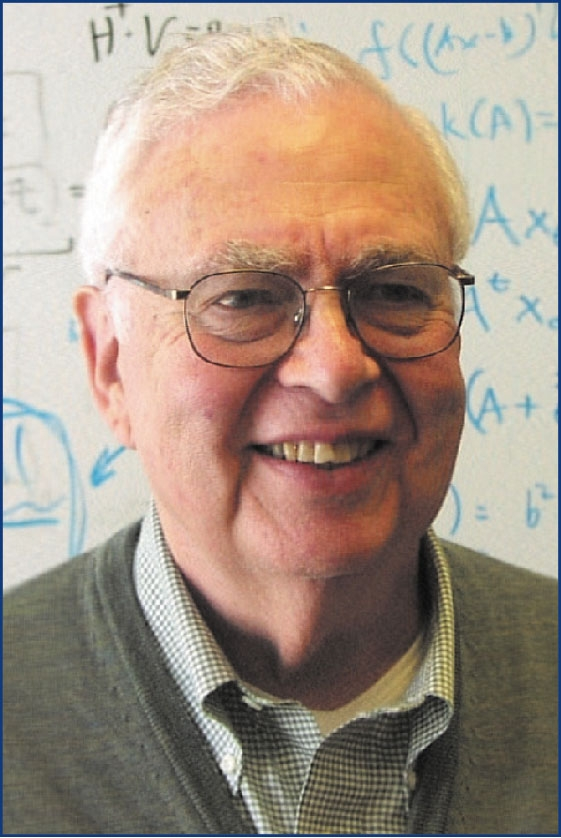

In [43]:
img = load("golub-561-838-rank-120.jpg")

In [44]:
channels = float(channelview(img))
size(channels)

(3, 838, 561)

In [45]:
channels[3, :, :]

838×561 Matrix{Float32}:
 0.482353  0.482353  0.482353  0.439216  …  0.478431  0.458824  0.478431
 0.482353  0.470588  0.447059  0.431373     0.466667  0.478431  0.478431
 0.482353  0.447059  0.423529  0.54902      0.435294  0.435294  0.470588
 0.443137  0.431373  0.54902   0.984314     0.537255  0.470588  0.470588
 0.490196  0.435294  0.482353  0.968627     0.486275  0.427451  0.470588
 0.454902  0.427451  0.47451   0.968627  …  0.490196  0.466667  0.470588
 0.498039  0.458824  0.47451   0.952941     0.490196  0.458824  0.470588
 0.501961  0.447059  0.47451   0.968627     0.517647  0.462745  0.470588
 0.478431  0.427451  0.490196  0.968627     0.498039  0.458824  0.470588
 0.466667  0.423529  0.498039  0.980392     0.501961  0.466667  0.470588
 0.470588  0.423529  0.498039  0.976471  …  0.509804  0.470588  0.470588
 0.470588  0.427451  0.490196  0.968627     0.501961  0.470588  0.470588
 0.470588  0.427451  0.490196  0.964706     0.501961  0.454902  0.470588
 ⋮                        

In [46]:
function rank_approx(F::SVD, k)
    U, S, Vt = F.U, F.S, F.Vt
    M = U[:, 1:k] * Diagonal(S[1:k]) * Vt[1:k, :]
    M .= clamp.(M, 0.0, 1.0)
end
svdfactors = (svd(channels[1, :, :]), svd(channels[2, :, :]), svd(channels[3, :, :]))

(SVD{Float32, Float32, Matrix{Float32}}(Float32[-0.003199637 -0.0029656403 … -0.044991393 -0.001526569; -0.004179746 -0.0039850883 … 0.035701327 -0.05826251; … ; -0.006342915 -0.0060940012 … -0.03778211 0.0042664274; -0.04618499 -0.03854828 … -0.002849318 -0.00083829835], Float32[468.88867, 54.57105, 39.71555, 28.824673, 22.57935, 19.785109, 18.398611, 16.746635, 15.206865, 13.953563  …  0.01955544, 0.019050583, 0.018939432, 0.018432932, 0.018126065, 0.017615706, 0.01749371, 0.01726378, 0.01670906, 0.016428921], Float32[-0.003805637 -0.004965365 … -0.005104279 -0.0043171803; -0.00081138755 -0.0009842503 … -0.0010606674 -0.00088846794; … ; 0.02583301 0.083997756 … 0.029084459 -0.062140595; -0.015823774 -0.015476522 … -0.016167028 0.03590907]), SVD{Float32, Float32, Matrix{Float32}}(Float32[-0.0126129985 -0.016326398 … -0.009668494 0.03981755; -0.01231879 -0.016407914 … 0.07173748 -0.017678764; … ; -0.011949006 -0.016415928 … 0.00967763 0.013933945; -0.055155985 -0.07245965 … -0.02641279

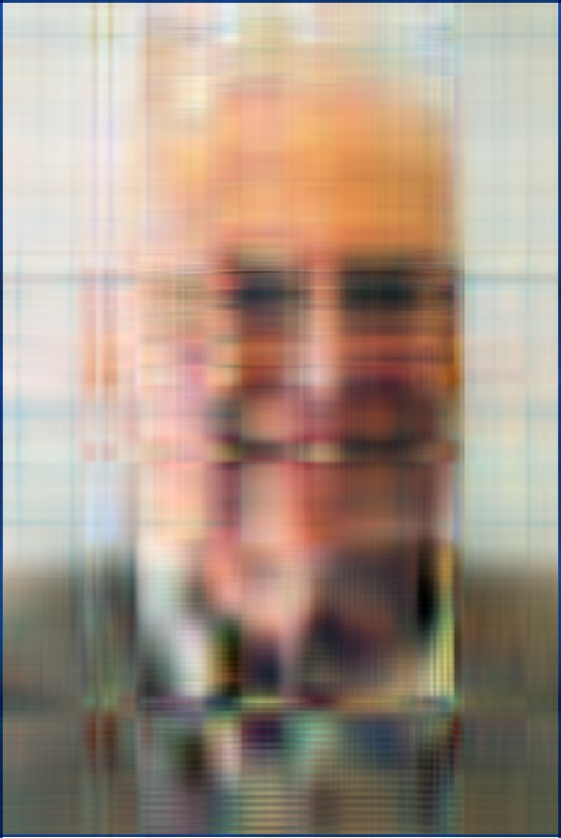

In [47]:
k1, k2, k3 = 5, 5, 5
colorview(RGB,
    rank_approx(svdfactors[1], k1),
    rank_approx(svdfactors[2], k2),
    rank_approx(svdfactors[3], k3)
)

- SVD has some inherent optimality properties. It prescribes how to approximate a general matrix $\mathbf{A}$ by a low rank matrix.

- Before talking about approximation, we need a metric that measures the quality of approximation. We discuss 3 matrix norms.

    - **Spectral norm** or $\ell_2$ norm:
$$
\|\mathbf{A}\|_2 = \max \frac{\|\mathbf{A} \mathbf{x}\|}{\|\mathbf{x}\|} = \sigma_1.
$$

    - **Frobenius norm**:
$$
\|\mathbf{A}\|_{\text{F}} = \sqrt{\sum_{i,j} a_{ij}^2} = \text{tr}(\mathbf{A}' \mathbf{A}) = \sqrt{\sigma_1^2 + \cdots + \sigma_r^2}.
$$

    - **Nuclear norm**:
$$
\|\mathbf{A}\|_{\text{nuc}} = \sigma_1 + \cdots + \sigma_r.
$$

- These 3 norms already have different values for the identity matrix:
\begin{eqnarray*}
    \|\mathbf{I}_n\|_2 &=& 1 \\
    \|\mathbf{I}_n\|_{\text{F}} &=& \sqrt{n} \\
    \|\mathbf{I}_n\|_{\text{nuc}} &=& n.
\end{eqnarray*}
Indeed for any orthogonal matrix $\mathbf{Q} \in \mathbb{R}^{n \times n}$,
\begin{eqnarray*}
    \|\mathbf{Q}\|_2 &=& 1 \\
    \|\mathbf{Q}\|_{\text{F}} &=& \sqrt{n} \\
    \|\mathbf{Q}\|_{\text{nuc}} &=& n.
\end{eqnarray*}

- **Invariance under orthogonal transform.** For all three norms,
$$
\|\mathbf{Q}_1 \mathbf{A} \mathbf{Q}_2'\| = \|\mathbf{A}\| \text{ for orthogonal } \mathbf{Q}_1 \text{ and } \mathbf{Q}_2.
$$

- **Eckart-Young theorem.** Assuming SVD of $\mathbf{A} \in \mathbb{R}^{m \times n}$ with rank $r$:
$$
\mathbf{A} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}' = \sum_{i=1}^r \sigma_i \mathbf{u}_i \mathbf{v}_i'.
$$
Then the matrix
$$
\mathbf{A}_k = \sum_{i=1}^k \sigma_i \mathbf{u}_i \mathbf{v}_i'
$$
is the best rank-$k$ approximation to the original matrix $\mathbf{A}$ in the 3 matrix norms ($\ell_2$, Frobenius, and nuclear). More precisely,
$$
\|\mathbf{A} - \mathbf{B}\|
$$
is minimized by $\mathbf{A}_k$ among all matrices $\mathbf{B}$ with rank $\le k$.

- **Proof of Eckart-Young theorem for the $\ell_2$ norm.** (optional)

    First we note
$$
\|\mathbf{A} - \mathbf{A}_k\|_2 = \left\|\sum_{i=1}^r \sigma_i \mathbf{u}_i \mathbf{v}_i' - \sum_{i=1}^k \sigma_i \mathbf{u}_i \mathbf{v}_i' \right\|_2 = \left\|\sum_{i=k+1}^r \sigma_i \mathbf{u}_i \mathbf{v}_i' \right\|_2 = \sigma_{k+1}.
$$
We want to show that
$$
\|\mathbf{A} - \mathbf{B}\|_2 = \max \frac{\|(\mathbf{A} - \mathbf{B}) \mathbf{x}\|}{\|\mathbf{x}\|} \ge \sigma_{k+1}
$$
for any $\mathbf{B}$ with $\text{rank}(\mathbf{B}) \le k$. We show this by choosing a particular $\mathbf{x}$ such that 
$$
\frac{\|(\mathbf{A} - \mathbf{B}) \mathbf{x}\|}{\|\mathbf{x}\|} \ge \sigma_{k+1}.
$$
Choose $\mathbf{x} \ne \mathbf{0}$ such that 
$$
\mathbf{B} \mathbf{x} = \mathbf{0} \text{ and } \mathbf{x} = \sum_{i=1}^{k+1} c_i \mathbf{v}_i.
$$
There exists such $\mathbf{x}$ because (1) $\mathcal{N}(\mathbf{B})$ has dimension $\ge n-k$ because $\text{rank}(\mathbf{B}) \le k$ (rank-nullity theorem) and (2) $\mathbf{v}_1, \ldots, \mathbf{v}_{k+1}$ span a subspace of dimension $k+1$. Thus $\mathcal{N}(\mathbf{B})$ and $\text{span}\{\mathbf{v}_1, \ldots, \mathbf{v}_{k+1}\}$ has a non-trivial intersection. For this $\mathbf{x}$, we have
\begin{eqnarray*}
& & \|(\mathbf{A} - \mathbf{B}) \mathbf{x}\|^2 \\
&=& \|\mathbf{A} \mathbf{x}\|^2 \\
&=& \left\|\left(\sum_{i=1}^r \sigma_i \mathbf{u}_i \mathbf{v}_i'\right)\left(\sum_{i=1}^{k+1} c_i \mathbf{v}_i\right)\right\|^2 \\
&=& \left\| \sum_{i=1}^{k+1} c_i \sigma_i \mathbf{u}_i \right\|^2 \\
&=& \sum_{i=1}^{k+1} c_i^2 \sigma_i^2 \\
&\ge& \left(\sum_{i=1}^{k+1} c_i^2\right) \sigma_{k+1}^2 \\
&=& \|\mathbf{x}\|^2 \sigma_{k+1}^2.
\end{eqnarray*}
The proof is finished.

- **(Nathan Srebro's) Proof of Eckart-Young theorem for the Frobenius norm.** (optional)

    Let $\mathbf{B}$ be a matrix of rank $k$. By the rank factorization, $\mathbf{B} = \mathbf{C} \mathbf{R}$, where $\mathbf{C} \in \mathbb{R}^{m \times k}$ and $\mathbf{R} \in \mathbb{R}^{k \times n}$. Using SVD of $\mathbf{B}$, we will assume that $\mathbf{C}$ has orthogonal columns (so $\mathbf{C}' \mathbf{C} = \mathbf{D}$) and $\mathbf{R}$ has orthonormal rows (so $\mathbf{R} \mathbf{R}' = \mathbf{I}_k$). We want to show $\mathbf{C} = \mathbf{U}_k \boldsymbol{\Sigma}_k$ and $\mathbf{R} = \mathbf{V}_k'$, where $(\boldsymbol{\Sigma}_k, \mathbf{U}_k, \mathbf{V}_k)$ are the top $k$ singular values/vectors of $\mathbf{A}$. 
    In order for $\mathbf{B} = \mathbf{C} \mathbf{R}$ to minimize
$$
f(\mathbf{C}, \mathbf{R}) = \|\mathbf{A} - \mathbf{C} \mathbf{R}\|_{\text{F}}^2,
$$
the gradient (partial derivatives) must vanish
\begin{eqnarray*}
    \frac{\partial f(\mathbf{C}, \mathbf{R})}{\partial \mathbf{C}} &=& - 2(\mathbf{A} - \mathbf{C} \mathbf{R}) \mathbf{R}' = \mathbf{O}_{m \times k} \\
\frac{\partial f(\mathbf{C}, \mathbf{R})}{\partial \mathbf{R}} &=& - 2 \mathbf{C}' (\mathbf{A} - \mathbf{C} \mathbf{R})  = \mathbf{O}_{k \times n}.
\end{eqnarray*}
The first equation shows
$$
\mathbf{A} \mathbf{R}' = \mathbf{C} \mathbf{R} \mathbf{R}' = \mathbf{C}.
$$
Then by the second equation
$$
\mathbf{A}' \mathbf{A} \mathbf{R}' = \mathbf{A}' \mathbf{C} =  \mathbf{R}' \mathbf{C}' \mathbf{C} = \mathbf{R}' \mathbf{D}.
$$
This says the columns of $\mathbf{R}'$ (rows of $\mathbf{R}$) must be eigenvectors of $\mathbf{A}' \mathbf{A}$, or equivalently, right singular vectors $\mathbf{v}_i$ of $\mathbf{A}$. Similarly the columns of $\mathbf{C}$ must be eigenvectors of $\mathbf{A} \mathbf{A}'$, or equivalently, left singular vectors $\mathbf{u}_i$ of $\mathbf{A}$:
$$
\mathbf{A} \mathbf{A}' \mathbf{C} = \mathbf{A} \mathbf{R}' \mathbf{D} = \mathbf{C} \mathbf{D}.
$$
Which $\mathbf{u}_i$ and $\mathbf{v}_i$ shall we take to minimize $f$? Apparently we should choose those with largest singular values to achieve the minimum value $\sigma_{k+1}^2 + \cdots + \sigma_r^2$.

## Singular vectors and Rayleigh quotient

- Goal: Maximize the **Rayleigh quotient**
$$
\text{maximize} \quad f(\mathbf{x}) = \frac{\|\mathbf{A} \mathbf{x}\|^2}{\|\mathbf{x}\|^2} = \frac{\mathbf{x}' \mathbf{A}' \mathbf{A} \mathbf{x}}{\mathbf{x}' \mathbf{x}} = \frac{\mathbf{x}' \mathbf{S} \mathbf{x}}{\mathbf{x}' \mathbf{x}}.
$$

- Let's calculate the partial derivatives of the objective function $f(\mathbf{x})$
$$
\frac{\partial f(\mathbf{x})}{\partial x_i} = \frac{\left(2\sum_j s_{ij} x_j\right) (\mathbf{x}' \mathbf{x}) - (\mathbf{x}' \mathbf{S} \mathbf{x}) (2x_i)}{(\mathbf{x}' \mathbf{x})^2} = 2 (\mathbf{x}' \mathbf{x})^{-1} \left(\sum_j s_{ij} x_j - f(\mathbf{x}) x_i \right).
$$
Collecting partial derivatives into the gradient vector and setting it to zero
$$
\nabla f(\mathbf{x}) = 2 (\mathbf{x}' \mathbf{x})^{-1} \left[ \mathbf{S} \mathbf{x} - f(\mathbf{x}) \cdot \mathbf{x} \right] = \mathbf{0}
$$
yields
$$
\mathbf{S} \mathbf{x} = f(\mathbf{x}) \cdot \mathbf{x}.
$$
Thus the optimal $\mathbf{x}$ must be an eigenvector of $\mathbf{S} = \mathbf{A}' \mathbf{A}$ with corresponding eigenvalue $f(\mathbf{x})$. Which one shall we choose? Apparently the **top right singular vector** $\mathbf{x}^\star = \mathbf{v}_1$ gives us the maximal value which is equal to $\lambda_1 = \sigma_1^2$.

- Above we have shown
$$
\max_{\mathbf{x} \ne \mathbf{0}} \frac{\|\mathbf{A} \mathbf{x}\|}{\|\mathbf{x}\|} = \sigma_1,
$$
which is the spectral norm (or $\ell_2$ norm) of a matrix $\mathbf{A}$.

In [48]:
Random.seed!(216)
m, n, r = 5, 3, 2
A = randn(m, r) * randn(r, n)

5×3 Matrix{Float64}:
 -1.0641     0.119504     0.0684963
 -1.31293   -1.57973e-5  -0.0936312
 -0.726329  -0.584099    -0.757408
 -1.56673   -1.47246     -1.89051
  2.11855    0.495045     0.749092

In [49]:
x = randn(n)
norm(A * x) / norm(x)

1.6977178927883125

In [50]:
Asvd = svd(A)

SVD{Float64, Float64, Matrix{Float64}}
U factor:
5×3 Matrix{Float64}:
 -0.191907   0.489266  -0.485372
 -0.273553   0.48802   -0.308709
 -0.296984  -0.188106  -0.492257
 -0.693606  -0.572429  -0.0627439
  0.564847  -0.399245  -0.650276
singular values:
3-element Vector{Float64}:
 3.92086624799641
 1.5634315539256385
 7.808175744336089e-17
Vt factor:
3×3 Matrix{Float64}:
  0.781058    0.370191  0.502899
 -0.622804    0.520374  0.584231
 -0.0454182  -0.769526  0.636999

In [51]:
x = Asvd.Vt[1, :]
norm(A * x) / norm(x)

3.9208662479964085

- Similarly, the **second right singular vector** maximizes the Rayleigh quotient subject to an orthogonality constraint
\begin{eqnarray*}
\text{maximize} &\quad& f(\mathbf{x}) = \frac{\|\mathbf{A} \mathbf{x}\|^2}{\|\mathbf{x}\|^2} = \frac{\mathbf{x}' \mathbf{A}' \mathbf{A} \mathbf{x}}{\mathbf{x}' \mathbf{x}} = \frac{\mathbf{x}' \mathbf{S} \mathbf{x}}{\mathbf{x}' \mathbf{x}} \\
\text{subject to} &\quad& \mathbf{x} \perp \mathbf{v}_1.
\end{eqnarray*}
    
- **Submatrices have smaller singular values**. Let $\mathbf{B}$ be a submatrix of $\mathbf{A} \in \mathbb{R}^{m \times n}$. Then
$$
\|\mathbf{B}\| \le \|\mathbf{A}\|
$$
or equivalently
$$
\sigma_1 (\mathbf{B}) \le \sigma_1 (\mathbf{A}).
$$

    Proof: Let $\tilde{\mathbf{y}} \in \mathbb{R}^n$ hold corresponding entries in $\mathbf{y}$ and be zero elsewhere. Then
$$
\sigma_1 (\mathbf{B}) = \max \frac{\|\mathbf{B} \mathbf{y}\|}{\|\mathbf{y}\|} = \max \frac{\|\mathbf{A} \tilde{\mathbf{y}}\|}{\|\tilde{\mathbf{y}}\|} \le \max \frac{\|\mathbf{A} \mathbf{x}\|}{\|\mathbf{x}\|} = \sigma_1 (\mathbf{A}).
$$

In [52]:
svd(A[1:3, 1:2])

SVD{Float64, Float64, Matrix{Float64}}
U factor:
3×2 Matrix{Float64}:
 -0.567073  -0.388252
 -0.707395  -0.222205
 -0.421925   0.894363
singular values:
2-element Vector{Float64}:
 1.8473013324735643
 0.5714710759462295
Vt factor:
2×2 Matrix{Float64}:
 0.995311    0.0967302
 0.0967302  -0.995311

## Principal component analysis (PCA)

- PCA is a dimension reduction technique that finds the most informative linear combinations of the $p$ random variables $\mathbf{X} \in \mathbb{R}^p$. Mathematically it finds the linear combinations of the $p$ random variables that have the largest variances. If we know the population covariance of the $p$ variables is $\text{Cov}(\mathbf{X}) = \boldsymbol{\Sigma} \in \mathbb{R}^{p \times p}$, then
$$
\text{Var}(\mathbf{a}' \mathbf{X}) = \mathbf{a}' \text{Cov}(\mathbf{X}) \mathbf{a} = \mathbf{a}' \boldsymbol{\Sigma} \mathbf{a}.
$$
Apparently the larger magnitude of $\mathbf{a}$, the large variance $\text{Var}(\mathbf{a}' \mathbf{X})$. It makes sense to maximize the normalized version
$$
\text{maximize} \quad \frac{\mathbf{a}' \boldsymbol{\Sigma} \mathbf{a}}{\mathbf{a}' \mathbf{a}}.
$$

- Given a data matrix $\mathbf{X} \in \mathbb{R}^{n \times p}$, where there are $n$ observations of $p$ variables. We would substitute in the sample covariance matrix
$$
\widehat{\boldsymbol{\Sigma}} = \frac{\tilde{\mathbf{X}}'\tilde{\mathbf{X}}}{n-1},
$$
where $\tilde{\mathbf{X}}$ is the column-centered data, and maximize the Rayleigh quotient
$$
\text{maximize} \quad \frac{\mathbf{a}' \widehat{\boldsymbol{\Sigma}} \mathbf{a}}{\mathbf{a}' \mathbf{a}}.
$$
From earlier discussion we know the optimal $\mathbf{a}^\star$ maximizing this Rayleigh quotient is the top eigenvector of $\widehat{\boldsymbol{\Sigma}}$, or equivalently, the top right singular vector $\mathbf{v}_1$ of $\tilde{\mathbf{X}}$, achieving the optimal value $\lambda_1$.

    Similarly, right singular vectors $\mathbf{v}_k$ maximizes
$$
\frac{\mathbf{a}' \widehat{\boldsymbol{\Sigma}} \mathbf{a}}{\mathbf{a}' \mathbf{a}}
$$
subject to the constraint $\mathbf{a} \perp \mathbf{v}_i$ for $i =1,\ldots,k-1$.

- Coumns of 
$$
\mathbf{V}_r = \begin{pmatrix} \mid & & \mid \\
\mathbf{v}_1 & \cdots & \mathbf{v}_r \\
\mid & & \mid
\end{pmatrix} \in \mathbb{R}^{p \times r}
$$ 
are called the **principal components**.

- Columns of $\mathbf{X} \mathbf{V}_r \in \mathbb{R}^{n \times r}$ are called the **principal scores**.

## PCA example: Fisher's Iris data

In [53]:
# load iris dataset
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [54]:
# retrieve features and labels
X_labels = convert(Vector, iris[!, 5])

150-element Vector{CategoricalArrays.CategoricalValue{String, UInt8}}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [55]:
# use full dummy coding (one-hot coding) for categorical variable Species
X = (ModelMatrix(ModelFrame(
    @formula(1 ~ 1 + SepalLength + SepalWidth + PetalLength + PetalWidth + Species), 
    iris,
    contrasts = Dict(:Species => StatsModels.FullDummyCoding()))).m)[:, 2:5]

150×4 Matrix{Float64}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 5.4  3.7  1.5  0.2
 4.8  3.4  1.6  0.2
 4.8  3.0  1.4  0.1
 ⋮              
 6.0  3.0  4.8  1.8
 6.9  3.1  5.4  2.1
 6.7  3.1  5.6  2.4
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8

In [56]:
# center but not scale
X̃ = zscore(X, mean(X, dims=1), ones(1, size(X, 2)))

150×4 Matrix{Float64}:
 -0.743333    0.442667   -2.358  -0.999333
 -0.943333   -0.0573333  -2.358  -0.999333
 -1.14333     0.142667   -2.458  -0.999333
 -1.24333     0.0426667  -2.258  -0.999333
 -0.843333    0.542667   -2.358  -0.999333
 -0.443333    0.842667   -2.058  -0.799333
 -1.24333     0.342667   -2.358  -0.899333
 -0.843333    0.342667   -2.258  -0.999333
 -1.44333    -0.157333   -2.358  -0.999333
 -0.943333    0.0426667  -2.258  -1.09933
 -0.443333    0.642667   -2.258  -0.999333
 -1.04333     0.342667   -2.158  -0.999333
 -1.04333    -0.0573333  -2.358  -1.09933
  ⋮                              
  0.156667   -0.0573333   1.042   0.600667
  1.05667     0.0426667   1.642   0.900667
  0.856667    0.0426667   1.842   1.20067
  1.05667     0.0426667   1.342   1.10067
 -0.0433333  -0.357333    1.342   0.700667
  0.956667    0.142667    2.142   1.10067
  0.856667    0.242667    1.942   1.30067
  0.856667   -0.0573333   1.442   1.10067
  0.456667   -0.557333    1.242   0.700667
  0.

In [57]:
# Xsvd.V contains the principal components
Xsvd = svd(X̃)
Xsvd.V

4×4 adjoint(::Matrix{Float64}) with eltype Float64:
  0.361387   -0.656589   0.58203     0.315487
 -0.0845225  -0.730161  -0.597911   -0.319723
  0.856671    0.173373  -0.0762361  -0.479839
  0.358289    0.075481  -0.545831    0.753657

In [58]:
# compute the top 3 principal scores
Y = X̃ * Xsvd.V[:, 1:3]

150×3 Matrix{Float64}:
 -2.68413  -0.319397    0.0279148
 -2.71414   0.177001    0.210464
 -2.88899   0.144949   -0.0179003
 -2.74534   0.318299   -0.0315594
 -2.72872  -0.326755   -0.0900792
 -2.28086  -0.74133    -0.168678
 -2.82054   0.0894614  -0.257892
 -2.62614  -0.163385    0.0218793
 -2.88638   0.578312   -0.0207596
 -2.67276   0.113774    0.197633
 -2.50695  -0.645069    0.075318
 -2.61276  -0.0147299  -0.10215
 -2.78611   0.235112    0.206844
  ⋮                    
  1.16933   0.16499    -0.281836
  2.10761  -0.372288   -0.0272911
  2.31415  -0.183651   -0.322694
  1.92227  -0.409203   -0.113587
  1.41524   0.574916   -0.296323
  2.56301  -0.277863   -0.29257
  2.41875  -0.304798   -0.504483
  1.94411  -0.187532   -0.177825
  1.52717   0.375317    0.121898
  1.76435  -0.0788589  -0.130482
  1.90094  -0.116628   -0.723252
  1.39019   0.282661   -0.36291

In [59]:
# group results by testing set labels for color coding
setosa     = Y[X_labels .== "setosa"    , :]
versicolor = Y[X_labels .== "versicolor", :]
virginica  = Y[X_labels .== "virginica" , :];

In [60]:
# # visualize first 2 principal components in 2D interacive plot
# p = scatter(setosa[:, 1], setosa[:, 2], marker=:circle, linewidth=0)
# scatter!(versicolor[:, 1], versicolor[:, 2], marker=:circle, linewidth=0)
# scatter!(virginica[:, 1], virginica[:, 2], marker=:circle, linewidth=0)
# plot!(p, xlabel="PC1", ylabel="PC2")

In [61]:
# # visualize first 3 principal components in 3D interacive plot
# p = scatter(setosa[:, 1], setosa[:, 2], setosa[:, 3], marker=:circle, linewidth=0)
# scatter!(versicolor[:, 1], versicolor[:, 2], versicolor[:, 3], marker=:circle, linewidth=0)
# scatter!(virginica[:, 1], virginica[:, 2], virginica[:, 3], marker=:circle, linewidth=0)
# plot!(p, xlabel="PC1", ylabel="PC2", zlabel="PC3")

## PCA example: genomics

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fnature07331/MediaObjects/41586_2008_Article_BFnature07331_Fig1_HTML.jpg?as=webp" width="400" align="center"/>

Above picture is from the article [Genes mirror geography within Europe](http://www.nature.com/nature/journal/v456/n7218/full/nature07331.html) by Novembre et al (2008) published in _Nature_.  

## Matrix completion

Missing data is ubiquitous. Matrix completion (a hot topic in machine learning) aims to recover the missing values in a huge matrix. 

Candes and Tao proposes a technique to complete a matrix $\mathbf{Y}$ with a large number of missing entries by an optimization problem
\begin{eqnarray*}
    &\text{minimize}& \|\mathbf{X}\|_{\text{nuc}} \\
    &\text{subject to }& x_{ij}=y_{ij} \text{ for all observed entries} y_{ij}.
\end{eqnarray*}
That is we seek the matrix with minimal nuclear norm that agrees with the observed entries.

See an example [here](https://ucla-biostat-257-2020spring.github.io/slides/22-juliaopt/juliaopt.html#Example:-matrix-completion).

## Compressed sensing

See an example [here](https://ucla-biostat-257-2020spring.github.io/slides/29-lp/lp.html#LP-example:-compressed-sensing).